#### Import Relevant Libraries

In [42]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#### Import Data

The following code will import the data file into a pandas data-frame

In [43]:
# LOAD THE DATAFRAME

# open csv
df = pd.read_csv('/Users/katherinemead/Documents/GitHub/anly-501-project-kam515/501-project-website/codes/Migrant_Dataset.csv')

# look at first row
print(df.iloc[0])


English language learners         -1
Enrollment                        71
Guidance counselors               -1
instructional_aides_fte           -1
lea_admin_support_staff_fte       -1
lea_administrators_fte            -1
librarian_specialists_fte         -1
librarian_support_staff_fte       -1
number_of_schools                  7
other_staff_fte                    0
school_admin_support_staff_fte    -1
school_administrators_fte         -1
school_counselors_fte              0
school_psychologists_fte           0
school_staff_total_fte             0
spec_ed_students                  72
supervisory_union_number           0
support_staff_other_fte           -1
support_staff_stu_wo_psych_fte     0
support_staff_students_fte        -1
teachers_elementary_fte           -1
teachers_kindergarten_fte         -1
teachers_prek_fte                 -1
teachers_secondary_fte            -1
teachers_total_fte                -1
teachers_ungraded_fte             -2
migrantYN                         No
N

In [44]:
# INSERT CODE TO PRINT ITS SHAPE AND COLUMN NAMES
print(df.shape)
print(df.columns)

(18074, 27)
Index(['English language learners', 'Enrollment', 'Guidance counselors',
       'instructional_aides_fte', 'lea_admin_support_staff_fte',
       'lea_administrators_fte', 'librarian_specialists_fte',
       'librarian_support_staff_fte', 'number_of_schools', 'other_staff_fte',
       'school_admin_support_staff_fte', 'school_administrators_fte',
       'school_counselors_fte', 'school_psychologists_fte',
       'school_staff_total_fte', 'spec_ed_students',
       'supervisory_union_number', 'support_staff_other_fte',
       'support_staff_stu_wo_psych_fte', 'support_staff_students_fte',
       'teachers_elementary_fte', 'teachers_kindergarten_fte',
       'teachers_prek_fte', 'teachers_secondary_fte', 'teachers_total_fte',
       'teachers_ungraded_fte', 'migrantYN'],
      dtype='object')


In [45]:
# drop the columns with 0
df = df.drop(['other_staff_fte'], axis=1)
df = df.drop(['school_counselors_fte'], axis=1)
df = df.drop(['school_psychologists_fte'], axis=1)
df = df.drop(['school_staff_total_fte'], axis=1)
df = df.drop(['support_staff_stu_wo_psych_fte'], axis=1)

# Change YN to 1 and 0
df['migrantYN'] = df['migrantYN'].replace(['Yes'], 1)
df['migrantYN'] = df['migrantYN'].replace(['No'], 0)



#### Basic data exploration

In [46]:
#INSERT CODE TO PRINT THE FOLLOWING DATA-FRAME WHICH SUMMARIZES EACH COLUMN 
#(MEAN, MIN, MAX, STD, COUNT)
print(df.describe())

       English language learners     Enrollment  Guidance counselors  \
count               18074.000000   18074.000000         18074.000000   
mean                  142.441463    2755.762532             5.585814   
std                  1170.230726   11316.841348            23.978023   
min                    -2.000000      -2.000000            -2.000000   
25%                    -1.000000     173.000000             0.000000   
50%                     0.000000     668.000000             1.000000   
75%                    19.750000    2176.750000             4.000000   
max                 75108.000000  693680.000000          1132.000000   

       instructional_aides_fte  lea_admin_support_staff_fte  \
count             18074.000000                 18074.000000   
mean                 38.477481                     9.403231   
std                 131.791561                    43.984684   
min                  -2.000000                    -2.000000   
25%                   0.000000      

In [47]:
# INSERT CODE TO EXPLORE THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH TARGET (THEN PRINT THE RESULT)
print(df['migrantYN'].value_counts())

0    16657
1     1417
Name: migrantYN, dtype: int64


(22, 22)


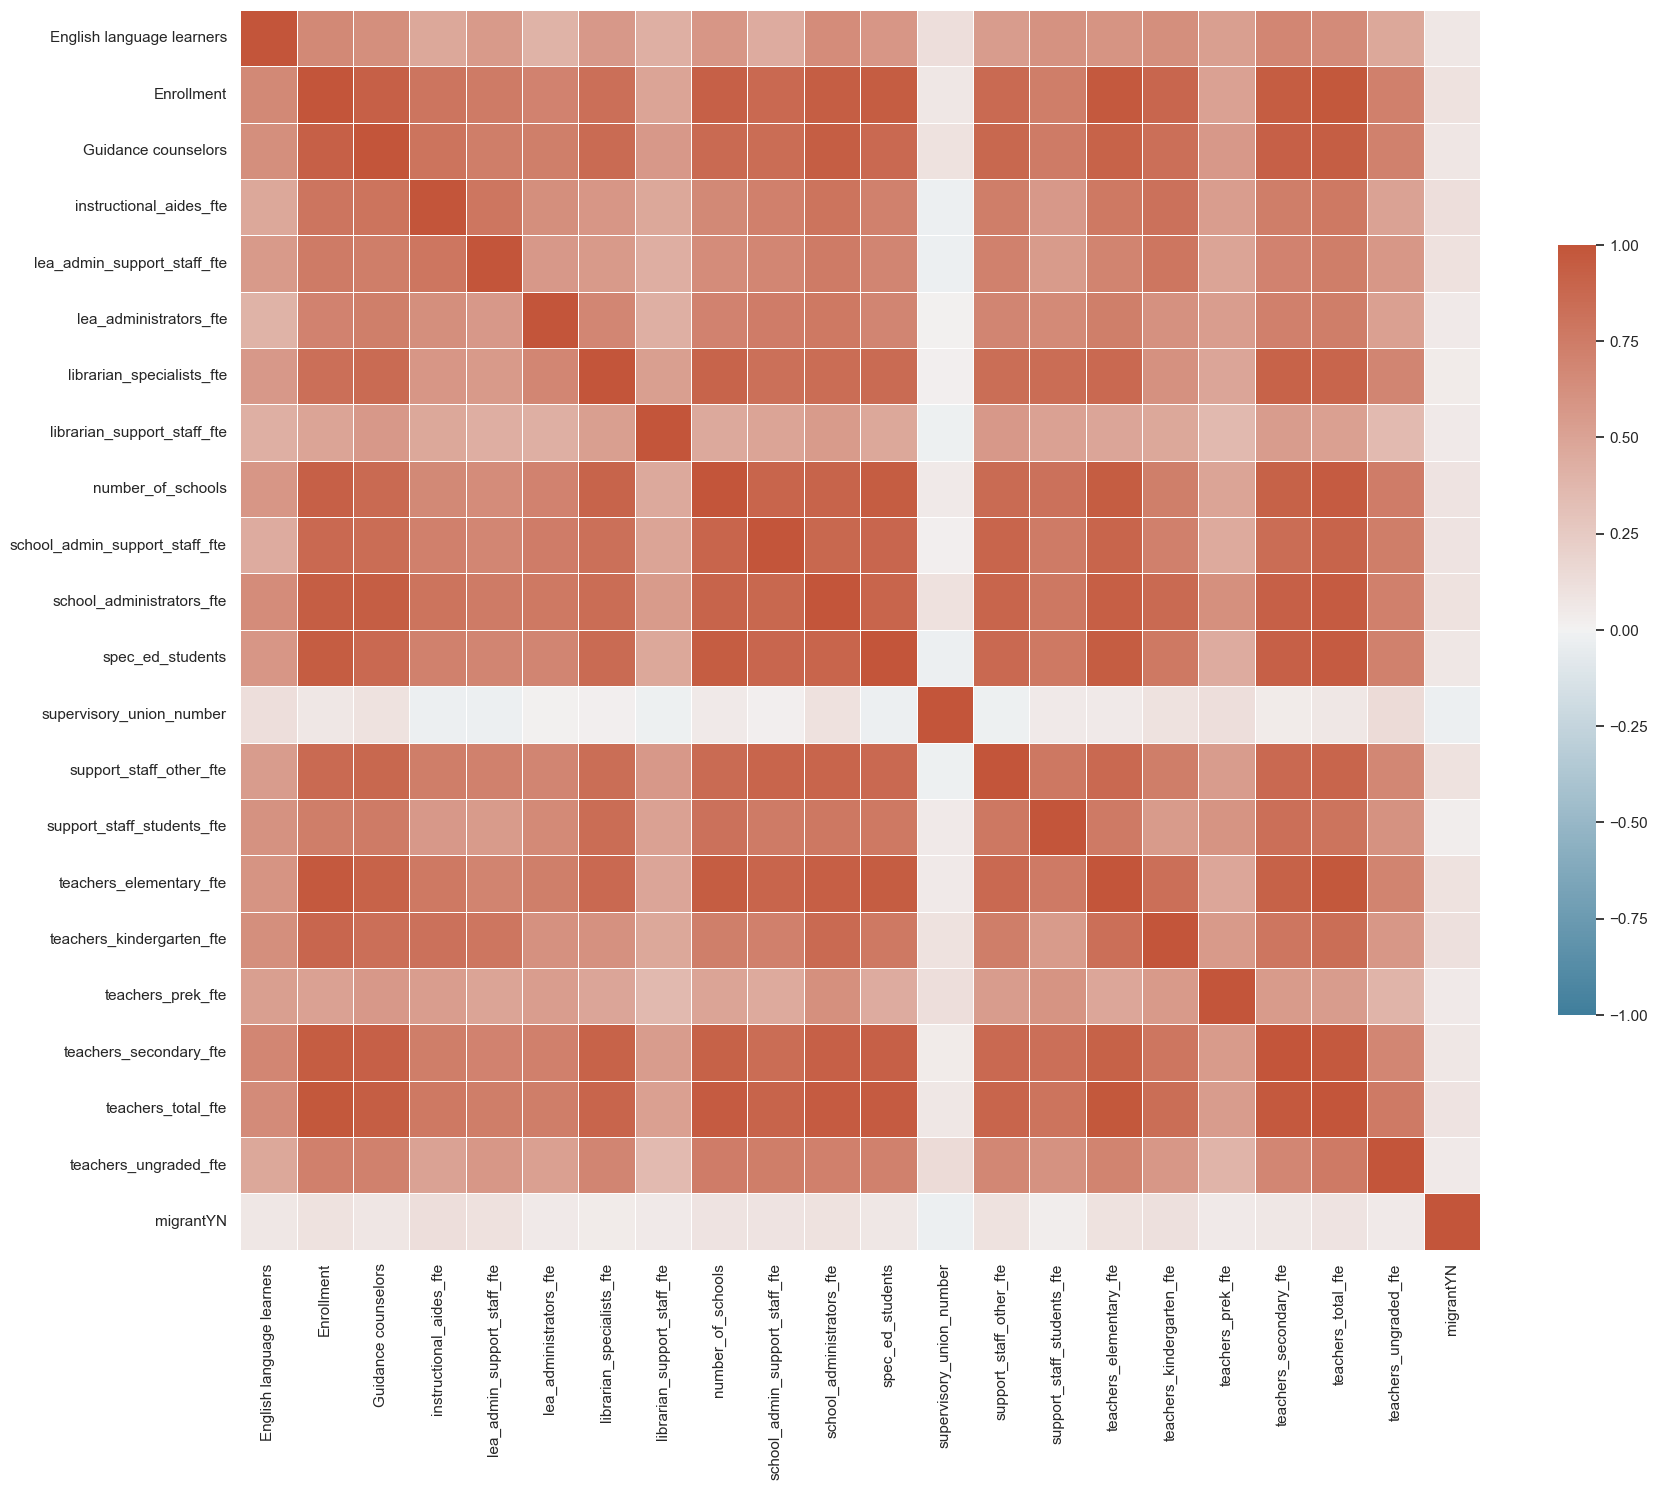

In [48]:
# RUN THE FOLLOWING CODE TO SHOW THE HEAT-MAP FOR THE CORRELATION MATRIX
corr = df.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

When the dataset is very large then the seaborn pairplot is often very slow. 

However, in this case it can still be useful to look at a subset of the features

In [49]:
# save complete df for later use
df_complete = df
df_complete.head()

,English language learners,Enrollment,Guidance counselors,instructional_aides_fte,lea_admin_support_staff_fte,lea_administrators_fte,librarian_specialists_fte,librarian_support_staff_fte,number_of_schools,school_admin_support_staff_fte,...,supervisory_union_number,support_staff_other_fte,support_staff_students_fte,teachers_elementary_fte,teachers_kindergarten_fte,teachers_prek_fte,teachers_secondary_fte,teachers_total_fte,teachers_ungraded_fte,migrantYN
0,-1,71,-1,-1,-1,-1,-1,-1,7,-1,...,0,-1,-1,-1,-1,-1,-1,-1,-2,0
1,770,3790,8,-1,-1,2,7,3,5,49,...,0,134,10,111,24,1,89,225,-2,0
2,436,5647,15,-1,-1,2,13,4,15,79,...,0,294,17,180,38,5,167,390,-2,0
3,758,12479,32,-1,-1,2,17,17,16,232,...,0,744,45,447,101,9,457,1015,-2,0
4,368,8298,17,-1,-1,1,11,9,10,79,...,0,331,34,209,45,4,223,481,-2,0


(18074, 11)


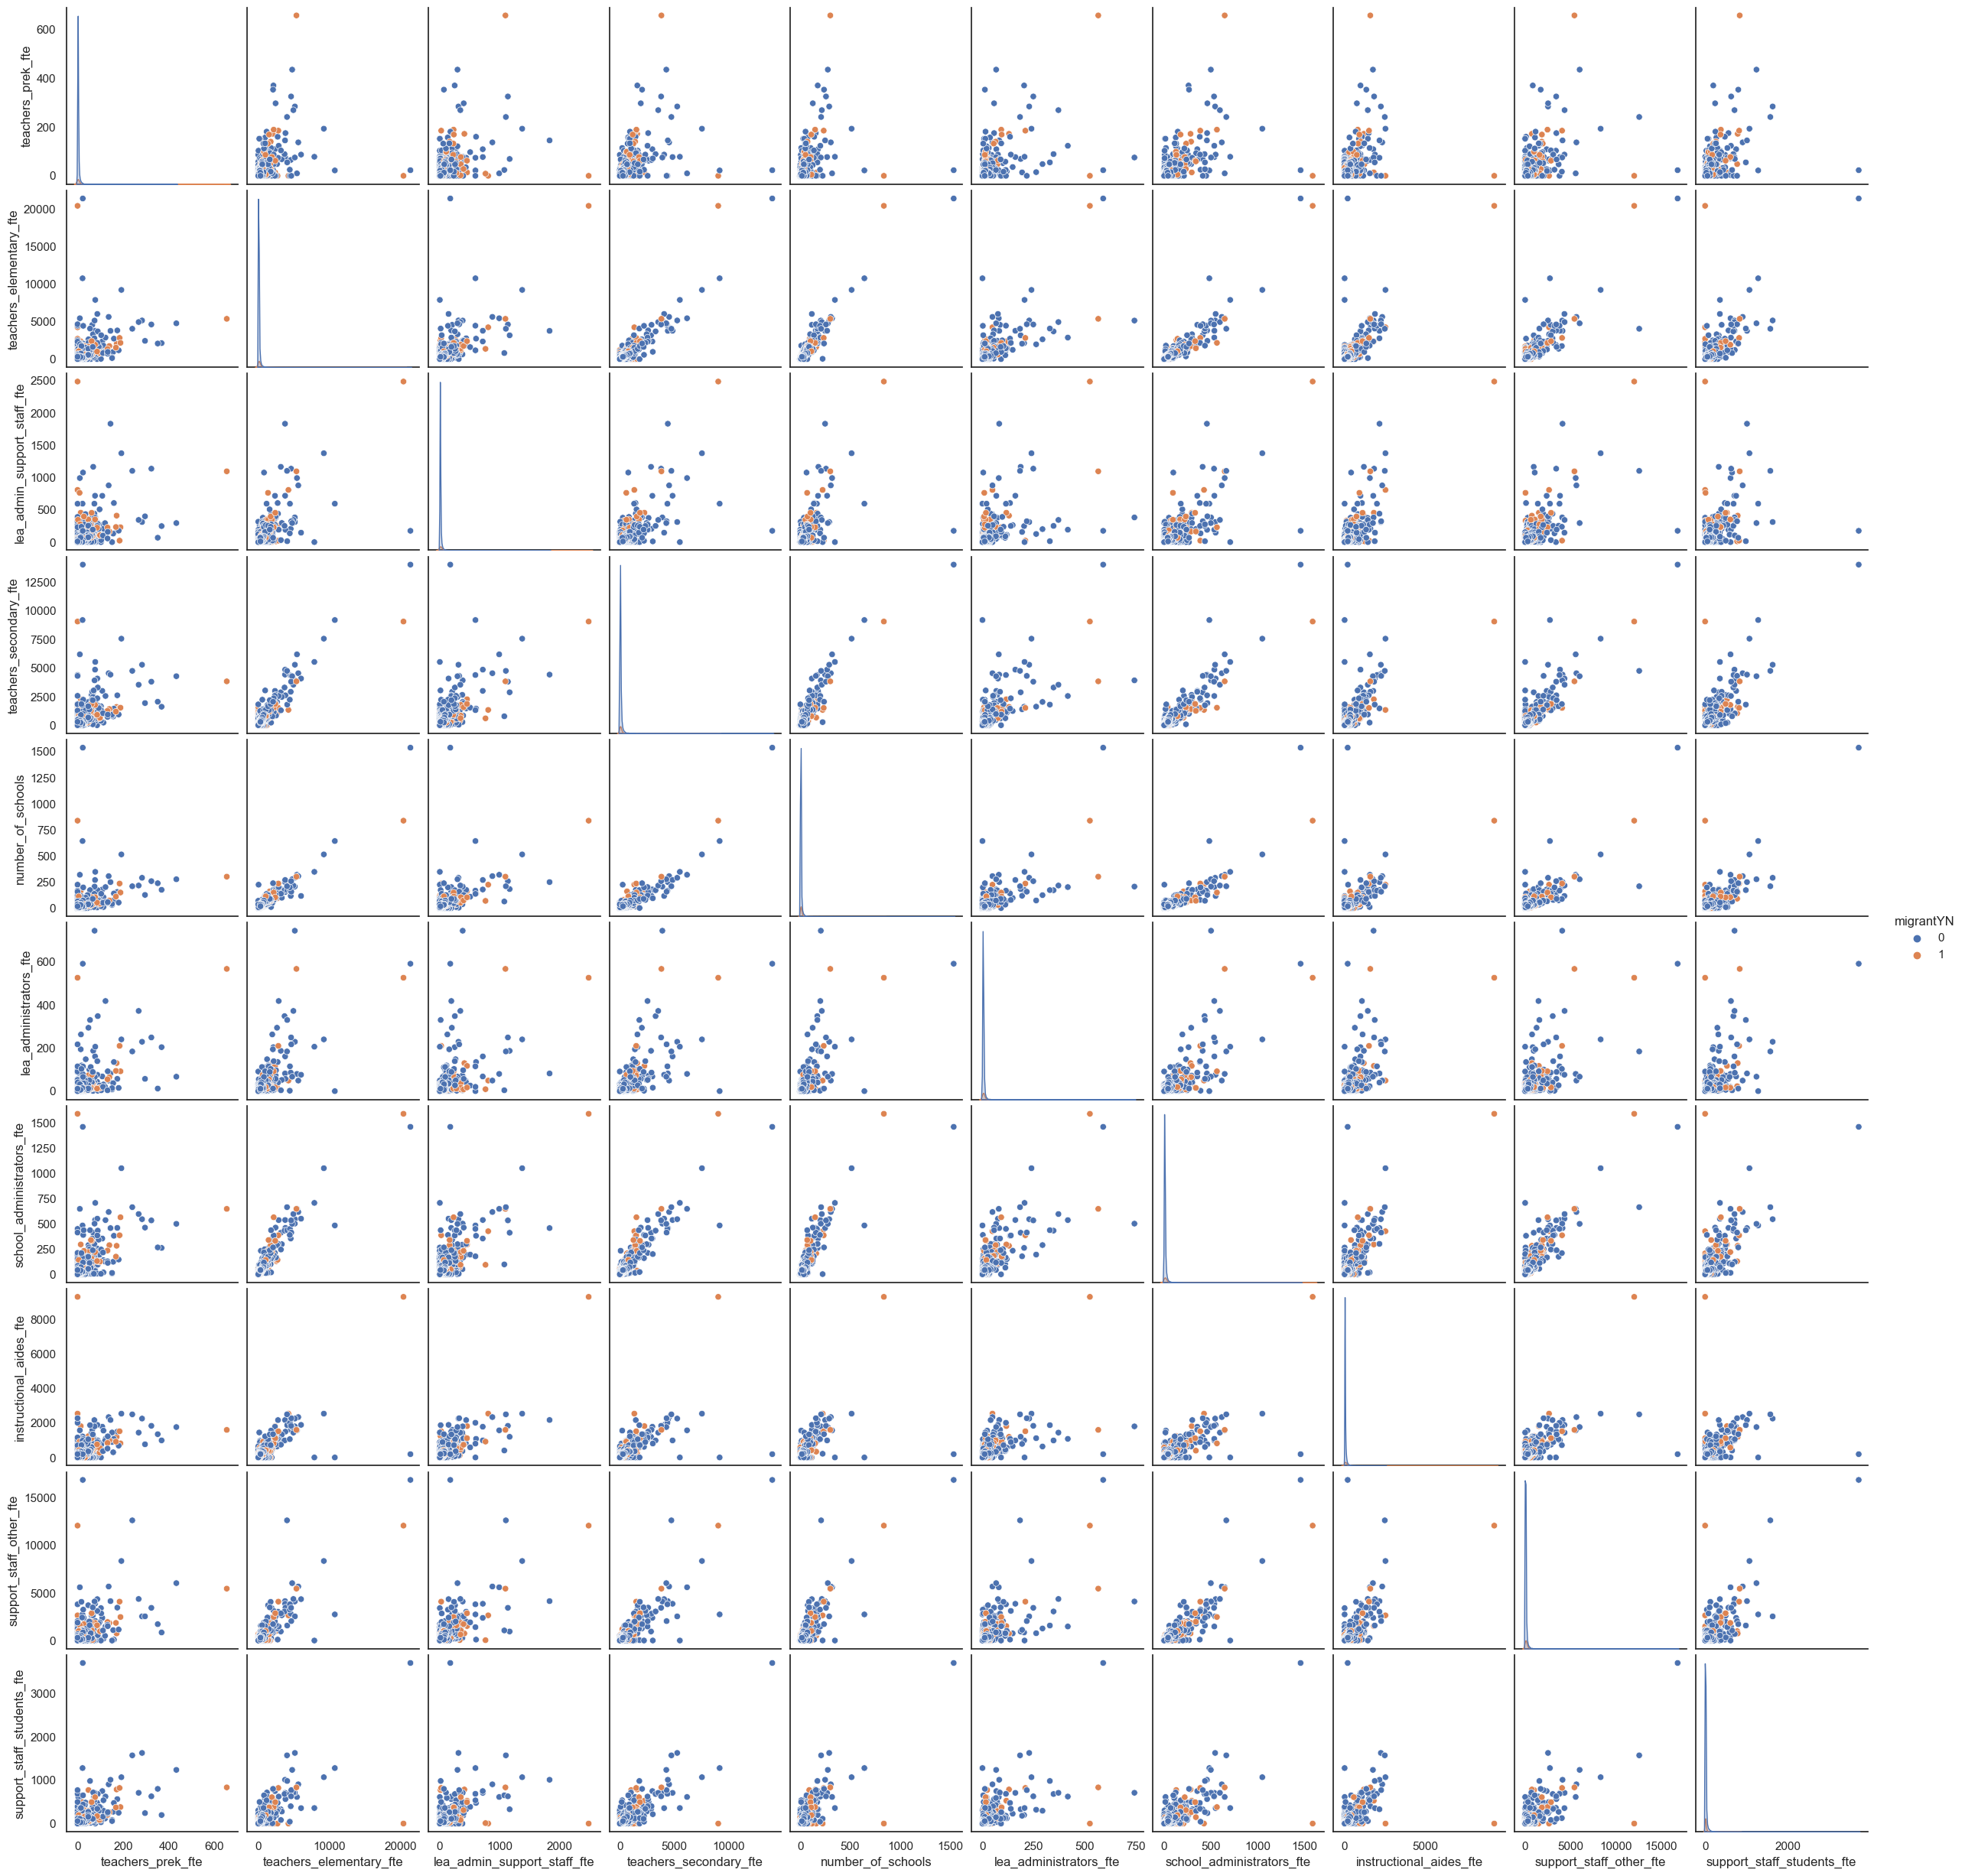

In [52]:
tmp=pd.concat([df.sample(n=10,axis=1),y],axis=1)
print(tmp.shape)
sns.pairplot(tmp,hue="migrantYN", diag_kind='kde')
plt.show()

In [51]:
# # RUN THE FOLLOWING CODE TO GENERATE A SEABORN PAIRPLOT 
sns.pairplot(df, hue='migrantYN', diag_kind='hist', corner=True)

# name migrantYN as Y variable
y = df['migrantYN']
y = df['migrantYN']
df=df.drop(['migrantYN'], axis=1)

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
tmp=pd.concat([df.sample(n=10,axis=1),y],axis=1)
print(tmp.shape)
sns.pairplot(tmp,hue="migrantYN", diag_kind='kde')
plt.show()

KeyError: 'migrantYN'

Error in callback <function flush_figures at 0x7fafd0cfdcf0> (for post_execute):


KeyboardInterrupt: 

 #### Isolate inputs/output & Split data

In [ ]:
# INSERT CODE TO MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="target" COLUMN and X="everything else"

dfx = df_complete.drop(columns=['migrantYN'])
dfy = df_complete['migrantYN']

KeyError: "['migrantYN'] not found in axis"

In [ ]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=42)

In [ ]:
# INSERT CODE, AS A CONSISTENCY CHECK, TO PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
print(type(X_train))
print(X_train.shape)
print(type(X_test))
print(X_test.shape)
print(type(y_train))
print(y_train.shape)
print(type(y_test))
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
(14459, 21)
<class 'pandas.core.frame.DataFrame'>
(3615, 21)
<class 'pandas.core.series.Series'>
(14459,)
<class 'pandas.core.series.Series'>
(3615,)


 #### Training the model

In [ ]:
#### INSERT CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train,y_train)

 #### Check the results 

Evaluate the performance of the decision tree model by using the test data. 

In [ ]:
# INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)


Use the following reference to display the confusion matrix.
 [SKlearn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) will give you the code you need. 

 In the function below, also print the following as part of the function output
 ```
ACCURACY: 0.9035087719298246
NEGATIVE RECALL (Y=0): 0.9574468085106383
NEGATIVE PRECISION (Y=0): 0.8333333333333334
POSITIVE RECALL (Y=1): 0.8656716417910447
POSITIVE PRECISION (Y=1): 0.9666666666666667
[[45  2]
 [ 9 58]]
 ```

In [ ]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)

def confusion_plot(y_data,y_pred):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    cm = confusion_matrix(y_data,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes'])
    disp.plot()
    plt.show()
    print("Accuracy: ",accuracy_score(y_data,y_pred))
    print("Precision: ",precision_score(y_data,y_pred))
    print("Recall: ",recall_score(y_data,y_pred))

------TRAINING------


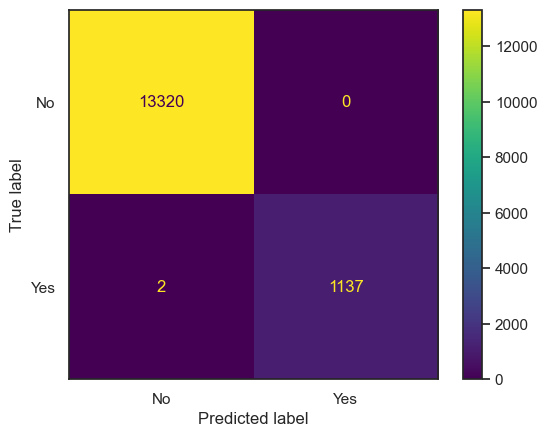

Accuracy:  0.9998616778477073
Precision:  1.0
Recall:  0.9982440737489026
------TEST------


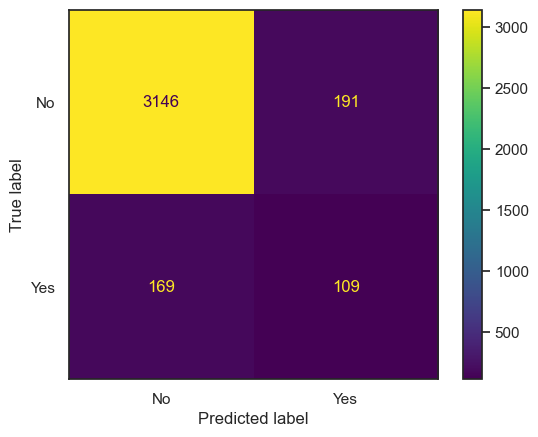

Accuracy:  0.9004149377593361
Precision:  0.36333333333333334
Recall:  0.3920863309352518


In [ ]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)


 #### Visualize the tree

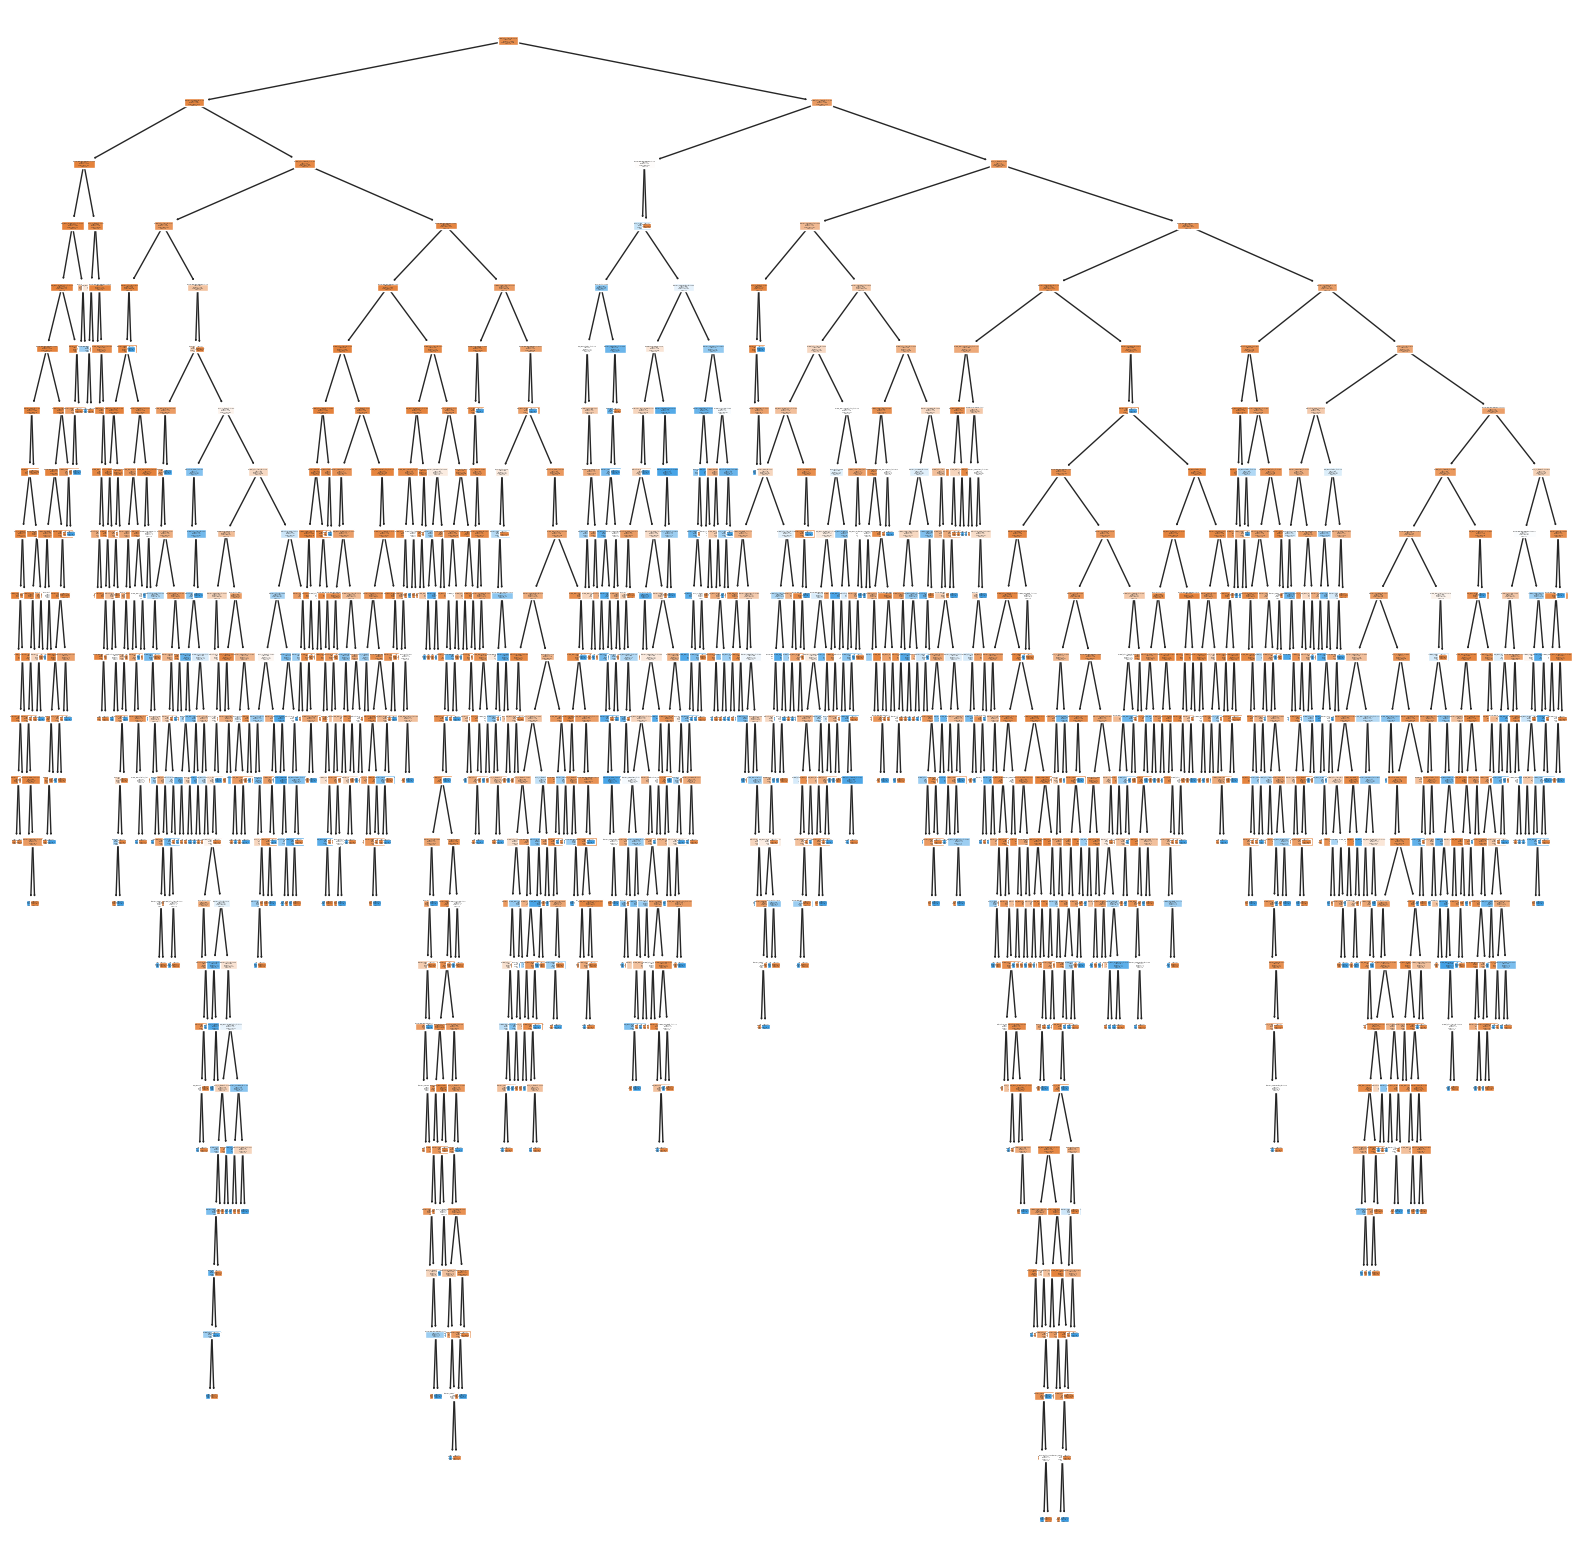

In [ ]:
# INSERT CODE TO WRITE A FUNCTION "def plot_tree(model,X,Y)" VISUALIZE THE DECISION TREE (see https://mljar.com/blog/visualize-decision-tree/ for an example)
def plot_tree(model,X,Y):
    from sklearn import tree
    plt.figure(figsize=(20,20))
    tree.plot_tree(model,feature_names=X.columns,class_names=['0','1'],filled=True)
    plt.show()


plot_tree(model, X_train, y_train)

------TRAINING------


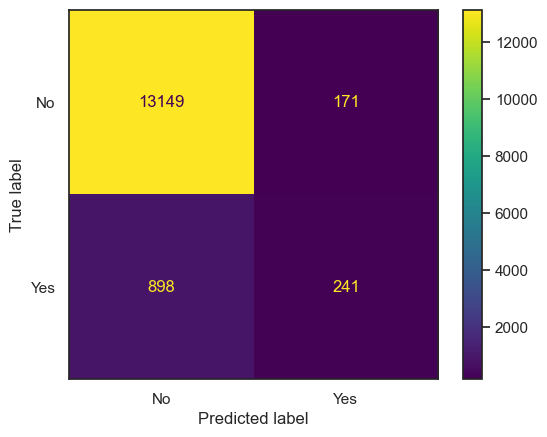

Accuracy:  0.9260668095995573
Precision:  0.5849514563106796
Recall:  0.2115891132572432
------TEST------


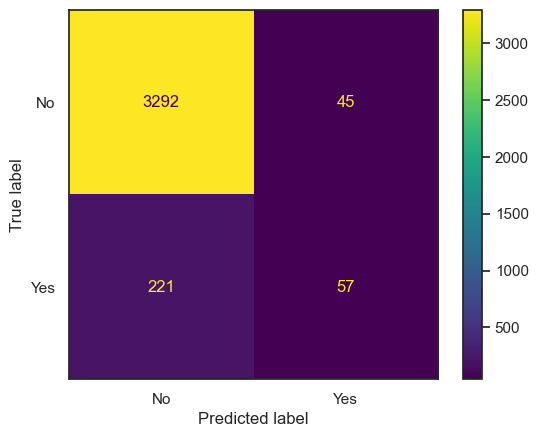

Accuracy:  0.926417704011065
Precision:  0.5588235294117647
Recall:  0.20503597122302158


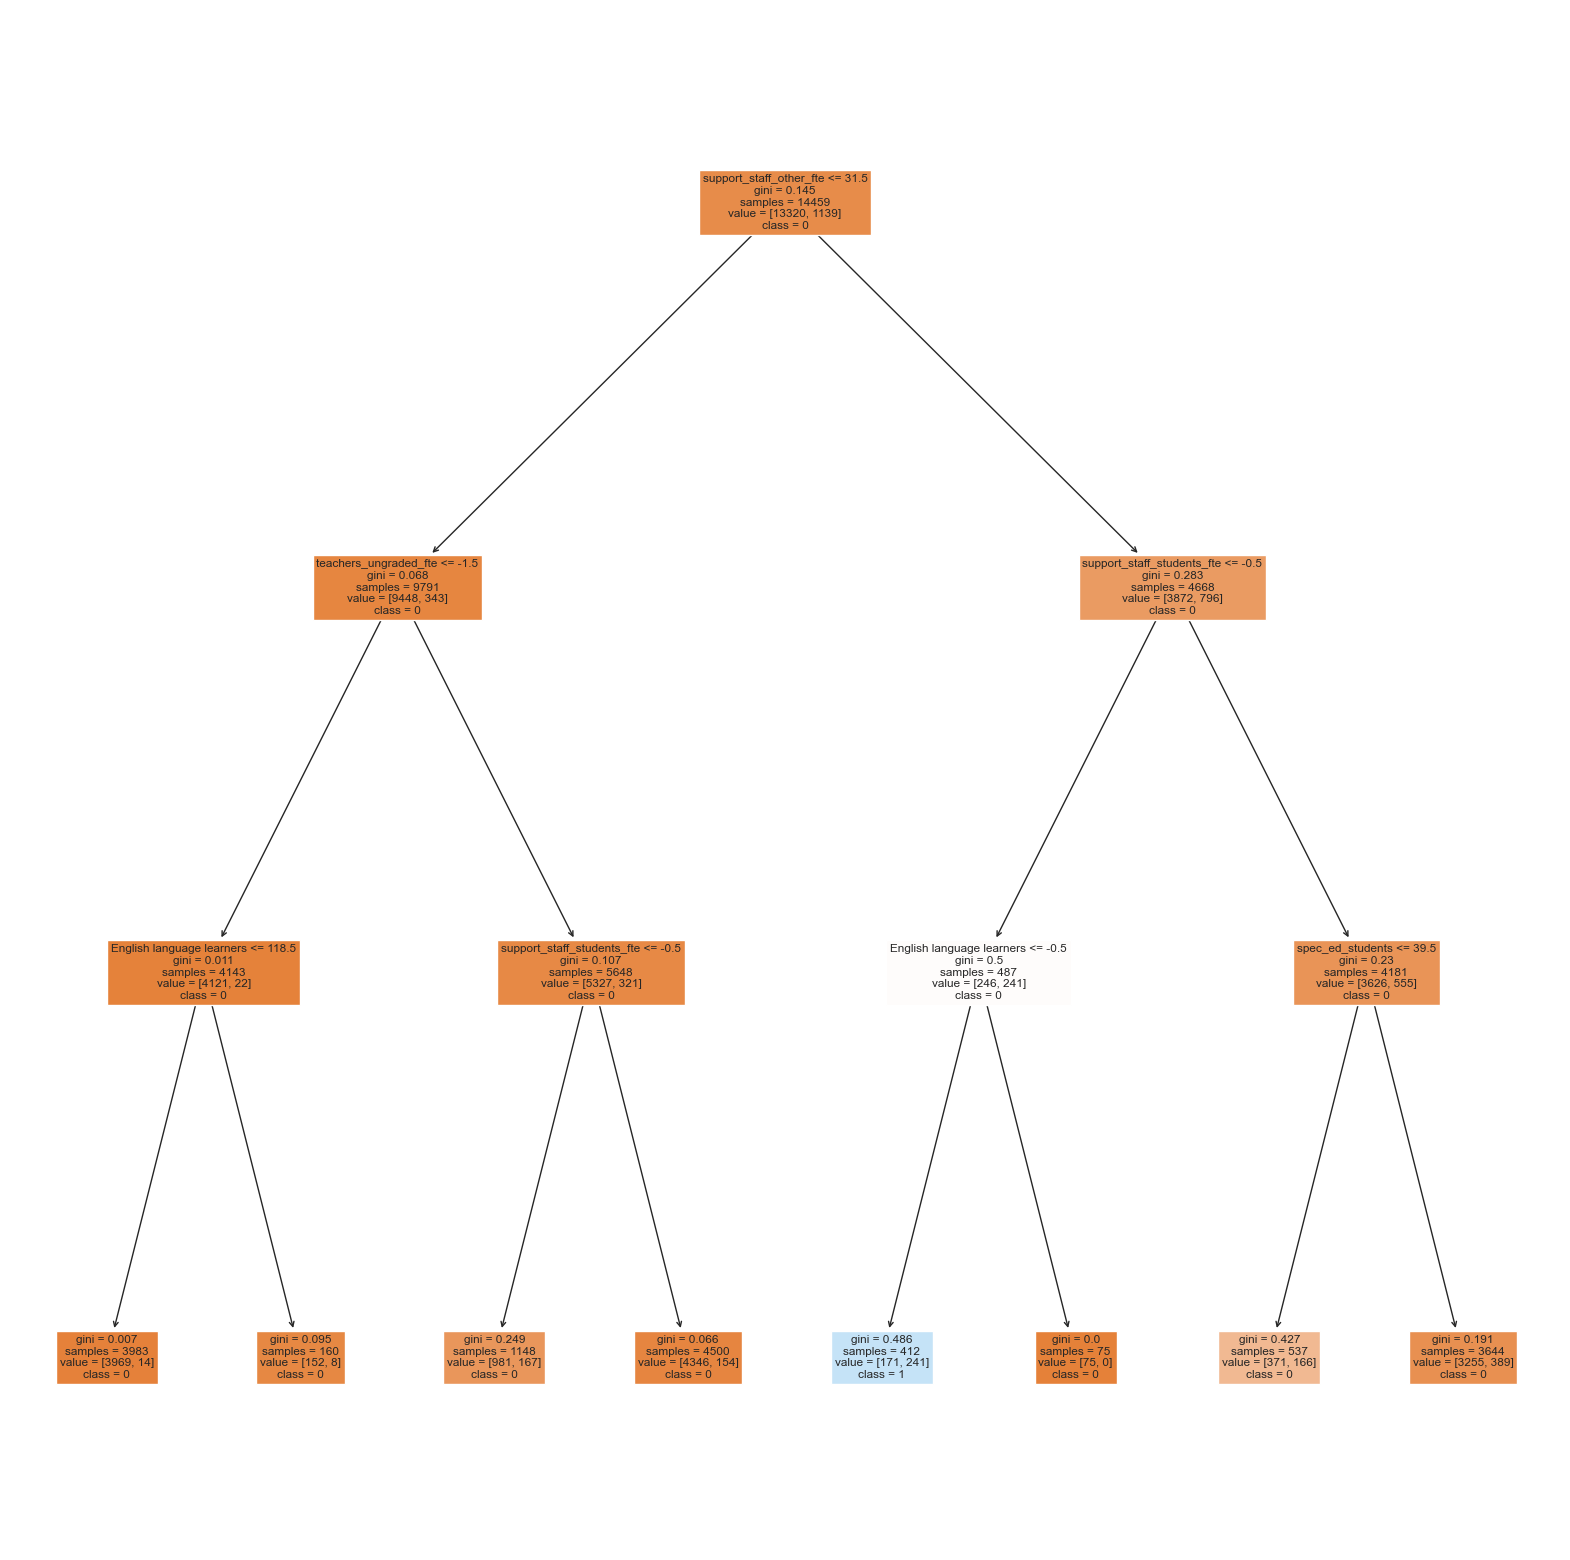

In [ ]:
# TESTING BY HARD-CODING MAX DEPTH
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train,y_train)
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)
plot_tree(model, X_train, y_train)

 #### Hyper-parameter turning

The "max_depth" hyper-parameter lets us control the number of layers in our tree.

Lets iterate over "max_depth" and try to find the set of hyper-parameters with the lowest training AND test error.

In [ ]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train,y_train)

    yp_train=model.predict(X_train)
    yp_test=model.predict(X_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])
    

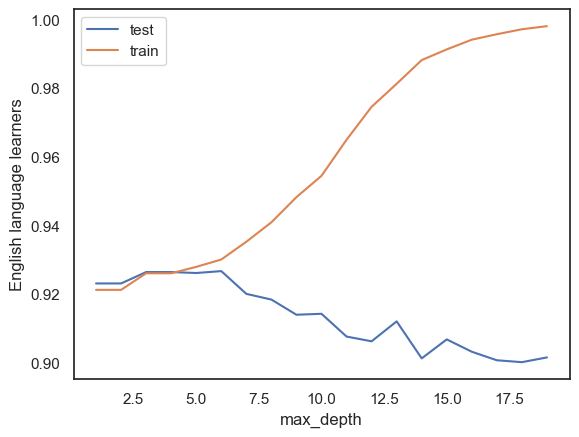

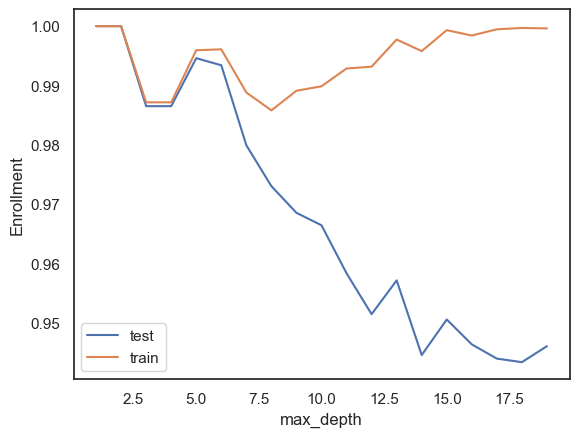

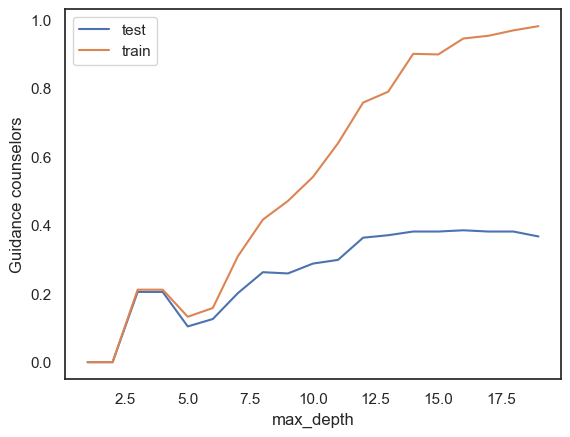

In [ ]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)

# NOTE: THERE IS A TYPO IN THE THIRD PLOT, IT SHOULD BE RECALL IN THE Y-AXIS LABEL NOT ACCURACY

# PLOT 1: ACCURACY VS MAX_DEPTH
plt.plot([x[0] for x in test_results],[x[1] for x in test_results],label='test')

plt.plot([x[0] for x in train_results],[x[1] for x in train_results],label='train')
plt.xlabel('max_depth')
plt.ylabel('English language learners')
plt.legend()
plt.show()

# PLOT 2: RECALL (BENIGN) VS MAX_DEPTH
plt.plot([x[0] for x in test_results],[x[2] for x in test_results],label='test')

plt.plot([x[0] for x in train_results],[x[2] for x in train_results],label='train')
plt.xlabel('max_depth')
plt.ylabel('Enrollment')
plt.legend()
plt.show()

# PLOT 3: RECALL (MALIGNANT) VS MAX_DEPTH
plt.plot([x[0] for x in test_results],[x[3] for x in test_results],label='test')

plt.plot([x[0] for x in train_results],[x[3] for x in train_results],label='train')
plt.xlabel('max_depth')
plt.ylabel('Guidance counselors')
plt.legend()
plt.show()


 #### Train optimal model 
 
 Re-train the decision tree using the optimal hyper-parameter obtained from the plot above
 

In [ ]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train,y_train)

yp_train=model.predict(X_train)
yp_test=model.predict(X_test)

------TRAINING------


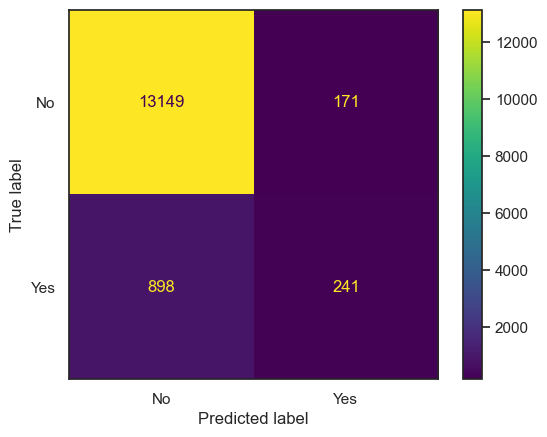

Accuracy:  0.9260668095995573
Precision:  0.5849514563106796
Recall:  0.2115891132572432
------TEST------


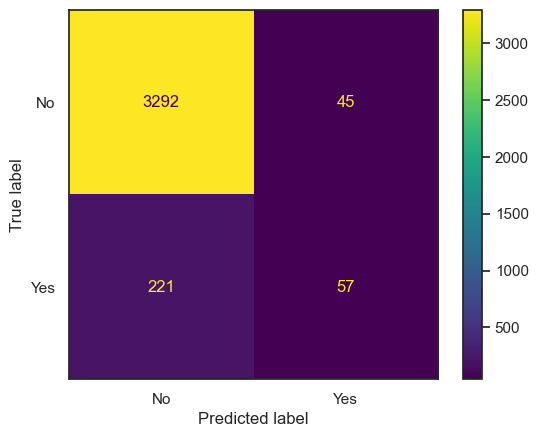

Accuracy:  0.926417704011065
Precision:  0.5588235294117647
Recall:  0.20503597122302158


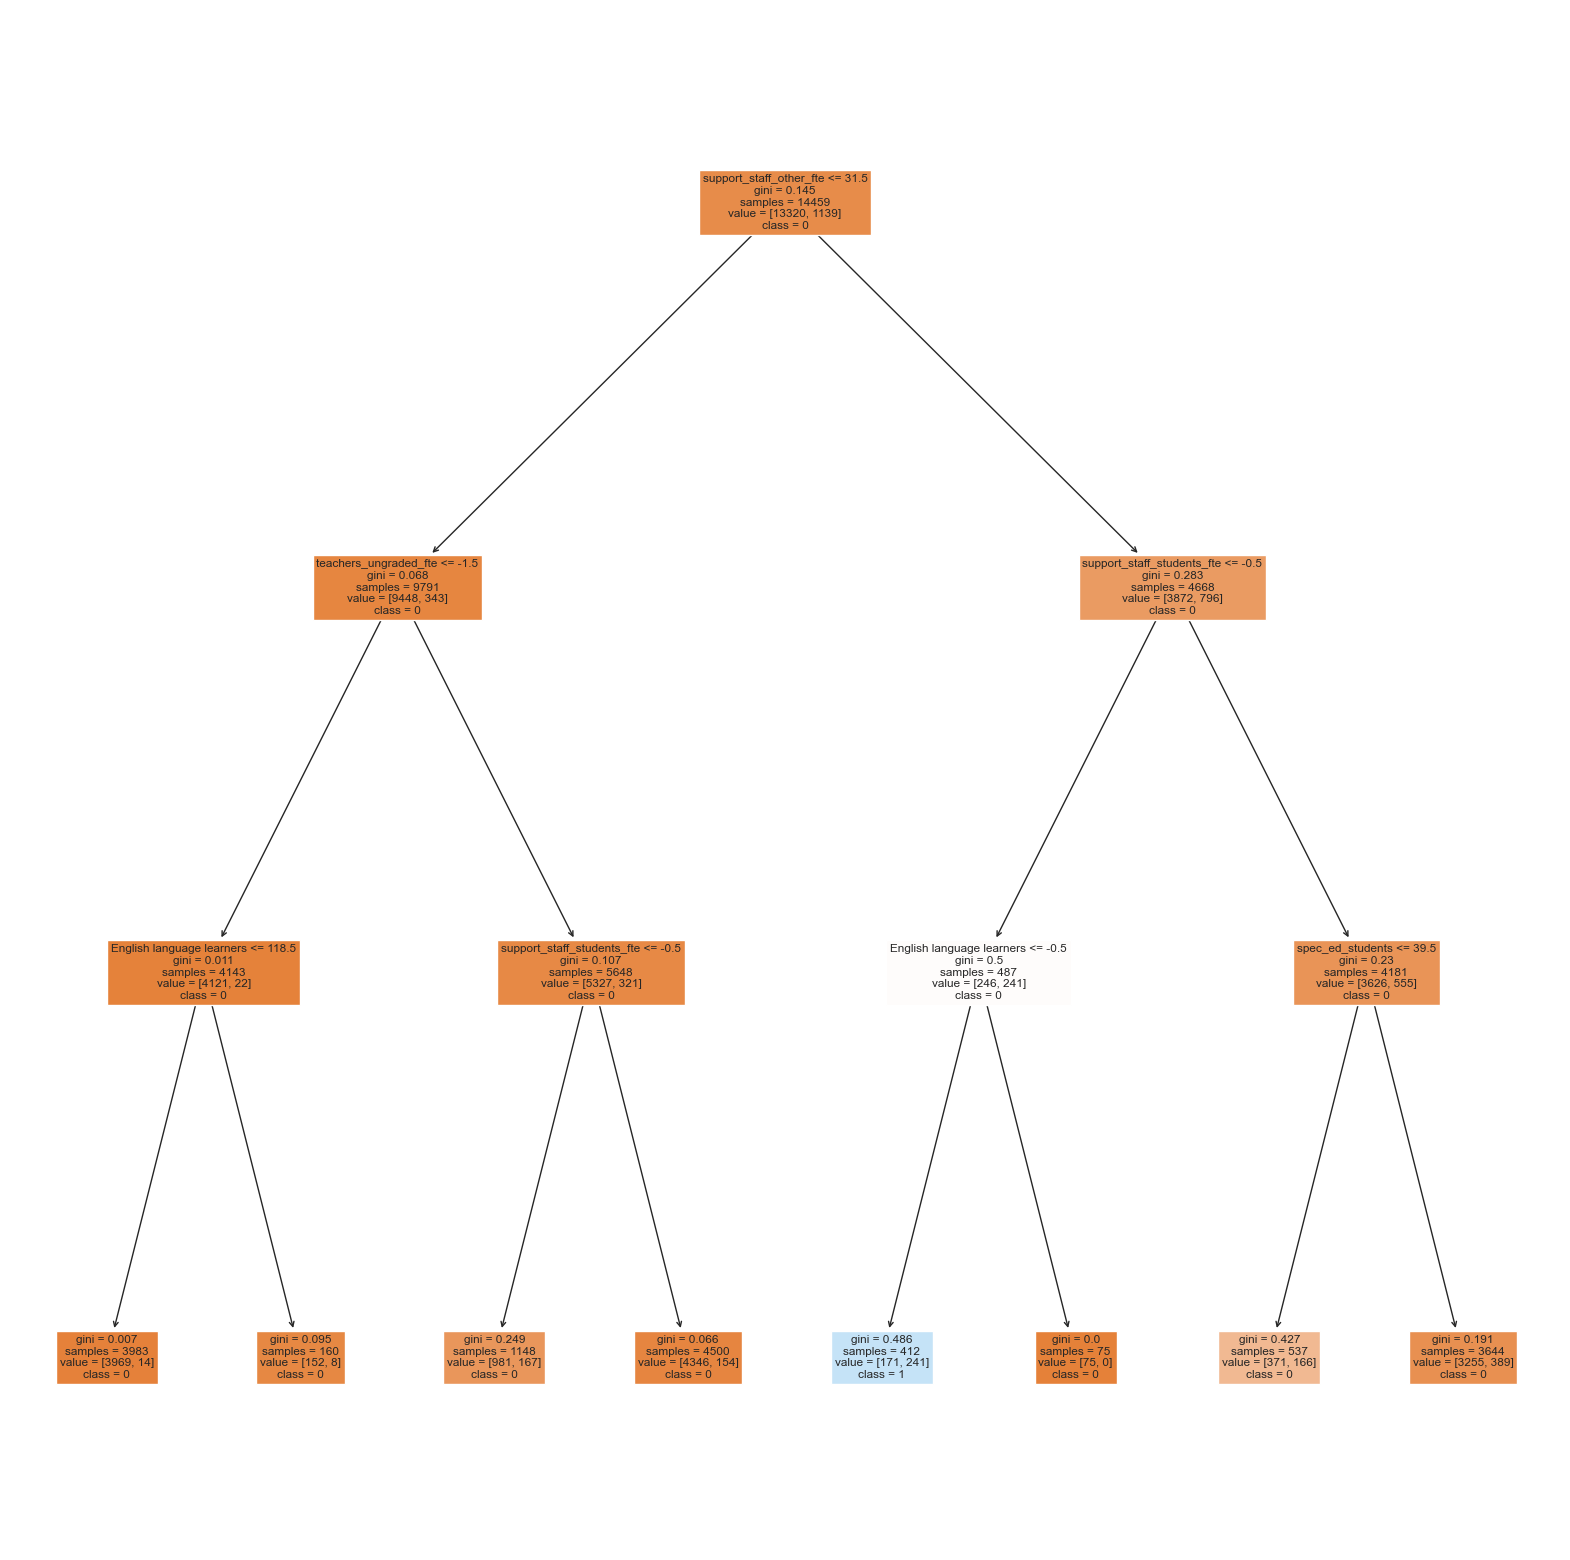

In [ ]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,dfx,dfy)
